In [1]:
import numpy as np
import matplotlib.pyplot as plt
from neuron import h, gui

from neuron.units import ms, mV

#specify singlecompartment Hodgkin-Huxley Neuron
soma = h.Section(name="soma")
soma.L = 200
soma.diam = 20
soma.insert("hh")
soma.insert("pas")
soma(0.5).pas.g=0.001
soma(0.5).hh.gkbar=0.015

In [5]:
#this shows all parameters
soma.psection()

{'point_processes': {},
 'density_mechs': {'pas': {'g': [0.001], 'e': [-70.0], 'i': [0.0]},
  'hh': {'gnabar': [0.12],
   'gkbar': [0.015],
   'gl': [0.0003],
   'el': [-54.3],
   'gna': [0.0],
   'gk': [0.0],
   'il': [0.0],
   'm': [0.0],
   'h': [0.0],
   'n': [0.0]}},
 'ions': {'na': {'ena': [50.0],
   'nai': [10.0],
   'nao': [140.0],
   'ina': [0.0],
   'dina_dv_': [0.0]},
  'k': {'ek': [-77.0],
   'ki': [54.4],
   'ko': [2.5],
   'ik': [0.0],
   'dik_dv_': [0.0]}},
 'morphology': {'L': 200.0,
  'diam': [20.0],
  'pts3d': [],
  'parent': None,
  'trueparent': None},
 'nseg': 1,
 'Ra': 35.4,
 'cm': [1.0],
 'regions': set(),
 'species': set(),
 'name': 'soma',
 'hoc_internal_name': '__nrnsec_000001b908c59130',
 'cell': None}

<IPython.core.display.Javascript object>


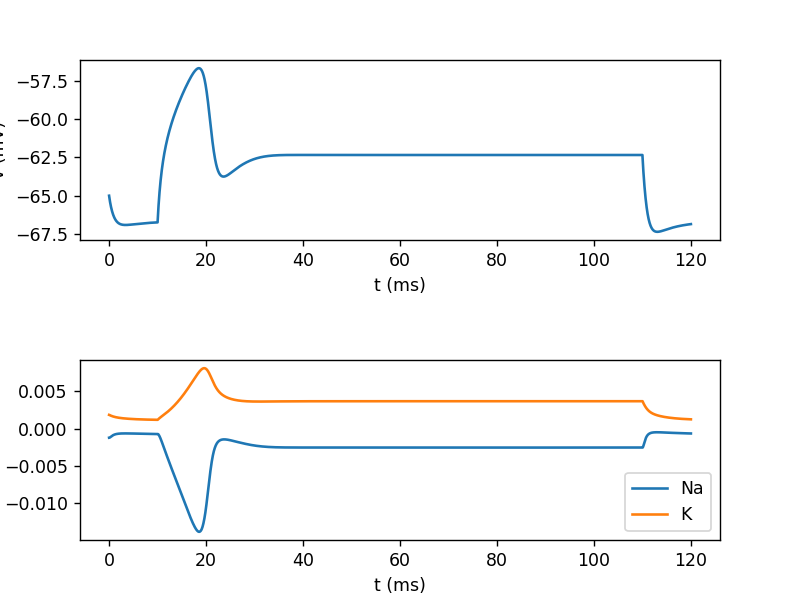

Text(0, 0.5, 'I (nA)')

In [22]:
# current clamp stimulation
#put a current clamp electrode into soma
iclamp = h.IClamp(soma(0.5))
iclamp.dur = 100 #ms
iclamp.delay = 10 #ms
iclamp.amp = 0.9#nA
#h.celsius = 20

#
v = h.Vector().record(soma(0.5)._ref_v)  # Membrane potential vector
ina = h.Vector().record(soma(0.5)._ref_ina)  # sodium current vector
ik = h.Vector().record(soma(0.5)._ref_ik)  # potassoium current vector
t = h.Vector().record(h._ref_t)  # Time stamp vector
h.load_file("stdrun.hoc")

h.finitialize(-65 * mV)
h.continuerun(120 * ms)

%matplotlib notebook
fig=plt.figure()
ax=fig.add_axes([0.1, 0.6, 0.8, 0.3])
ax.plot(t,v)
ax.set_xlabel("t (ms)")
ax.set_ylabel("v (mV)")
ax=fig.add_axes([0.1, 0.1, 0.8, 0.3])
ax.plot(t, ina, label='Na')
ax.plot(t, ik, label='K')
ax.legend()
ax.set_xlabel("t (ms)")
ax.set_ylabel("I (nA)")



<IPython.core.display.Javascript object>


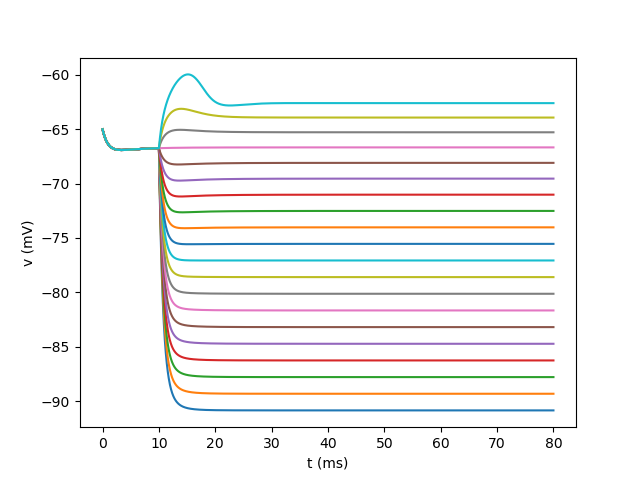

Text(0, 0.5, 'v (mV)')

In [8]:

plt.figure()
for iamp in np.arange(-4,.8,.25):
    iclamp.amp = iamp
    h.finitialize(-65 * mV)
    h.continuerun(80 * ms)
    plt.plot(t, v)
    

plt.xlabel("t (ms)")
plt.ylabel("v (mV)")



In [34]:
#np.array(v)[23]
np.array(t)[2300]

57.50000000000451

<IPython.core.display.Javascript object>


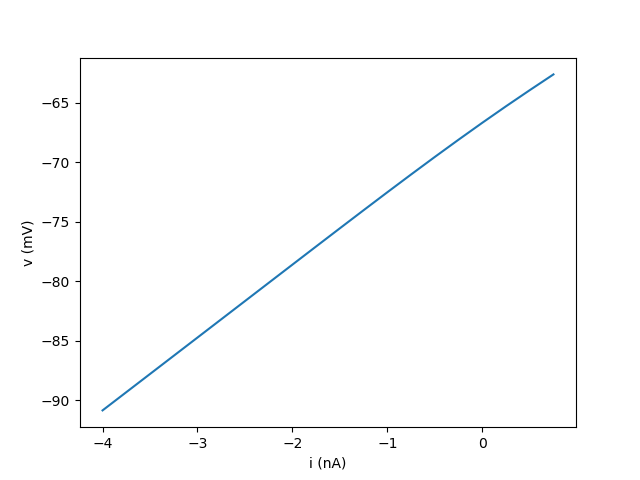

[-90.86065386244154, -89.32951200455541, -87.7980524077188, -86.26618749721618, -84.73385928985662, -83.2010637821731, -81.6678941422065, -80.13471929372355, -78.60213765926218, -77.07150426194475, -75.54449771390196, -74.02434772798608, -72.51411144348971, -71.019468871001, -69.54367914592503, -68.09407361389842, -66.67171634544351, -65.28220803196994, -63.927953343725605, -62.60122432339135]


Text(0, 0.5, 'v (mV)')

In [40]:
#Here you write the function that extracts the steady state voltage

vss=[]
i=[]

%matplotlib notebook
plt.figure()
for iamp in np.arange(-4,.8,.25):
    iclamp.amp = iamp
    h.finitialize(-65 * mV)
    h.continuerun(80 * ms)
    vss.append(np.array(v)[2300])
    i.append(iamp)
    
print(vss)
plt.plot(i, vss)



plt.xlabel("i (nA)")
plt.ylabel("v (mV)")



<IPython.core.display.Javascript object>


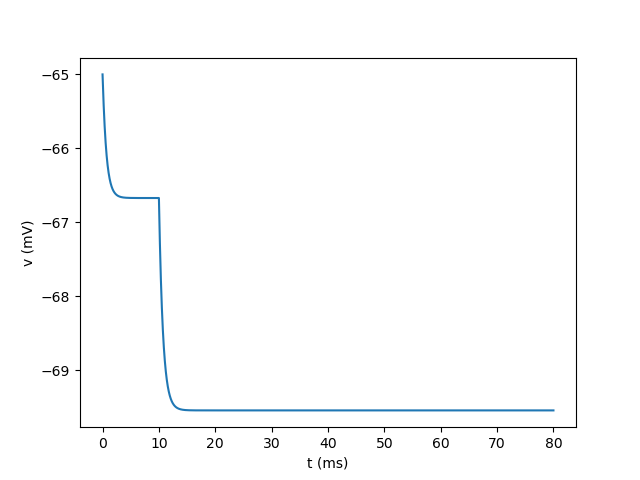

Text(0, 0.5, 'v (mV)')

In [8]:
# Passive properties

%matplotlib notebook
soma(0.5).hh.gnabar=0.035 # 35mS/cm^2
plt.figure()
iclamp.amp=-.5
h.finitialize(-65 * mV)
h.continuerun(80 * ms)
plt.plot(t, v)


plt.xlabel("t (ms)")
plt.ylabel("v (mV)")



<IPython.core.display.Javascript object>


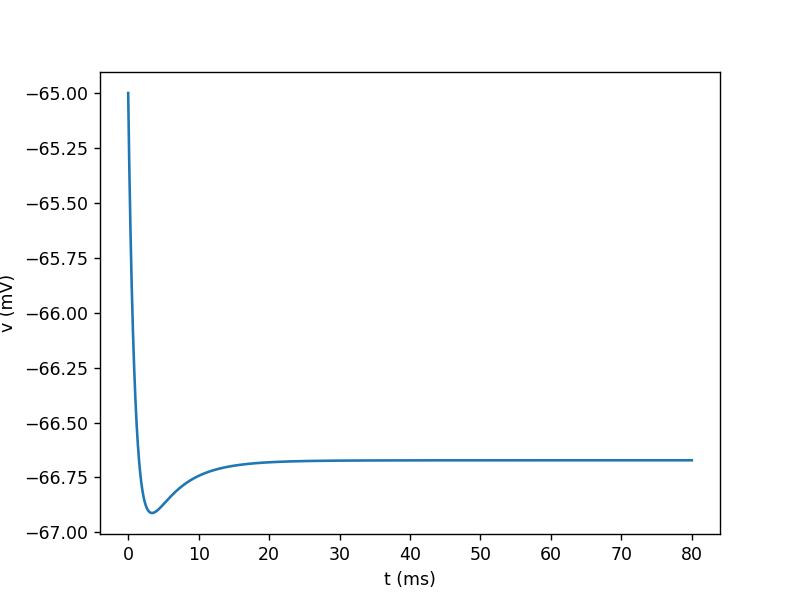

Text(0, 0.5, 'v (mV)')

In [12]:
# start this cell to set parameters back to original values
soma(0.5).hh.gnabar=0.12 
soma(0.5).hh.gkbar=0.015 
soma(0.5).pas.g=0.001


iclamp.amp=0
h.finitialize(-65 * mV)
h.continuerun(80 * ms)
plt.figure()
plt.plot(t, v)



plt.xlabel("t (ms)")
plt.ylabel("v (mV)")

<IPython.core.display.Javascript object>


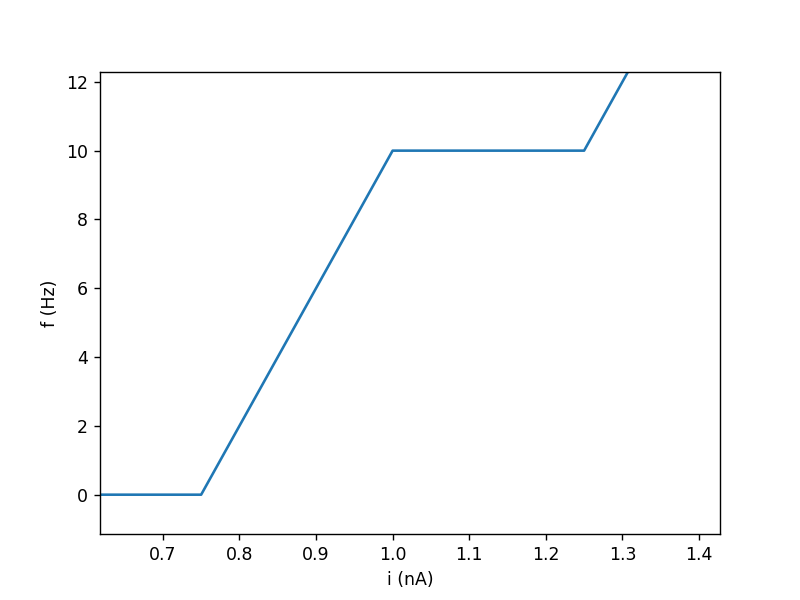

[0, 0, 0, 0, 0, 0, 10, 10, 20, 60, 70, 80, 80, 80, 90, 90, 100, 100, 100, 110, 110, 110, 110, 120, 120, 120]


Text(0, 0.5, 'f (Hz)')

In [13]:
#use this cell as a starting point to measure the F-I curve and study spontaneous activity
#

from scipy.signal import find_peaks

soma(0.5).hh.gnabar=0.12 #mS/cm^2
soma(0.5).hh.gkbar=0.015 #mS/cm^2
soma(0.5).pas.g=0.001


iclamp.amp=-0.5

#h.finitialize(-65 * mV)
#h.continuerun(80 * ms)
#plt.plot(t, v)


f=[]
i=[]

%matplotlib notebook
plt.figure()
for iamp in np.arange(-0.5,6,.25):
    iclamp.amp = iamp
    h.finitialize(-65 * mV)
    h.continuerun(120 * ms)
    x = np.array(v)
    #print(x)
    #plt.plot(t, v)
    peaks,_ = find_peaks(x, -20)
    f.append(len(peaks)*10)
    i.append(iamp)
    
print(f)
#print(i)
plt.plot(i, f)


plt.xlabel("i (nA)")
plt.ylabel("f (Hz)")

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html

<IPython.core.display.Javascript object>


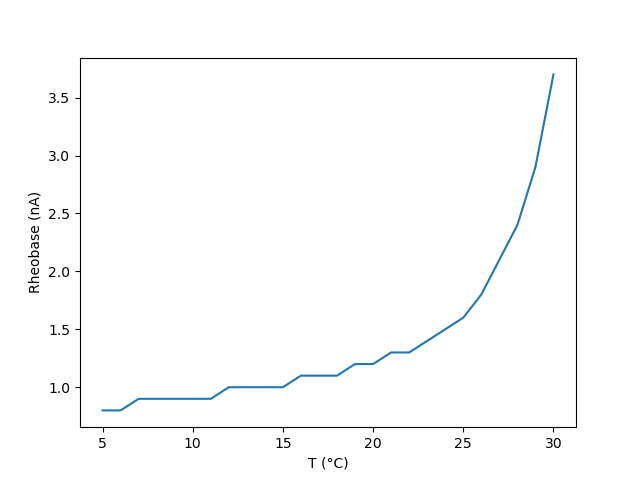

[0.8, 0.8, 0.9, 0.9, 0.9, 0.9, 0.9, 1.0, 1.0, 1.0, 1.0, 1.1, 1.1, 1.1, 1.2000000000000002, 1.2000000000000002, 1.3, 1.3, 1.4000000000000001, 1.5, 1.6, 1.8, 2.1, 2.4000000000000004, 2.9000000000000004, 3.7, nan, nan, nan, nan, nan, nan, nan, nan, nan]
35
[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
35


Text(0, 0.5, 'Rheobase (nA)')

In [8]:
#temperature dependence

from scipy.signal import find_peaks
from scipy.signal import peak_widths

soma(0.5).hh.gnabar=0.12 
soma(0.5).hh.gkbar=0.015 
soma(0.5).pas.g=0.001
#h.celsius=25 # temperature

#iclamp.amp=2
#h.finitialize(-65 * mV)
#h.continuerun(80 * ms)

rb=[]
T=[]

%matplotlib notebook
plt.figure()
for temp in np.arange(5,40,1):

    T.append(temp)
    ilist=[]
    for current in np.arange(0, 4, 0.1):
        #print(current)
        h.celsius = temp
        iclamp.amp = current
        h.finitialize(-65 * mV)
        h.continuerun(1020 * ms)
        x = np.array(v)
        #print(x)
        peaks,_ = find_peaks(x, 0)
        ilist.append(len(peaks))
    
    indices = np.argwhere(np.array(ilist)>0)
    if len(indices) == 0:
        rheobase = np.nan
   
    else:
        minind = np.min(indices)
        rheobase = np.arange(0, 4, 0.1)[minind]
        
    rb.append(rheobase)
    
        
        
        
        #if len(peaks) > 0:
        #    rheobase = current
        #    rb.append(rheobase)
        #    break
        #if


print(rb)
print(len(rb))
print(T)
print(len(T))
plt.plot(T,rb)


plt.xlabel("T (°C)")
plt.ylabel("Rheobase (nA)")

<IPython.core.display.Javascript object>


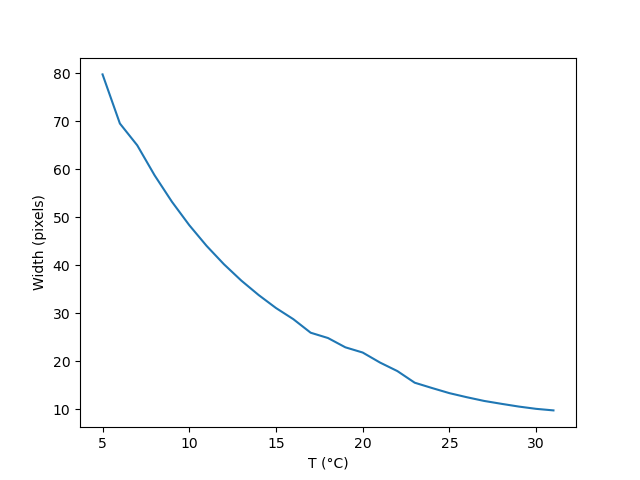

35
35


Text(0, 0.5, 'Width (pixels)')

In [5]:
#temperature dependence
###1.11.3###

from scipy.signal import find_peaks
from scipy.signal import peak_widths

soma(0.5).hh.gnabar=0.12 
soma(0.5).hh.gkbar=0.015 
soma(0.5).pas.g=0.001
#h.celsius=25 # temperature

iclamp.amp=5
#h.finitialize(-65 * mV)
#h.continuerun(80 * ms)

width=[]
T=[]


%matplotlib notebook
plt.figure()
for temp in np.arange(5,40,1):
    h.celsius = temp
    h.finitialize(-65 * mV)
    h.continuerun(80 * ms)
    x = np.array(v)
    #print(x)
    peaks,_ = find_peaks(x, 0)
    #print(peaks)
    tmp = peak_widths(x, peaks)
    widths=np.mean(tmp[0])
    #print(widths)
    T.append(temp)
    width.append(widths)

    
        
#print(width)
print(len(width))
#print(T)
print(len(T))
plt.plot(T,width)


plt.xlabel("T (°C)")
plt.ylabel("Width (pixels)")
        
        

<IPython.core.display.Javascript object>


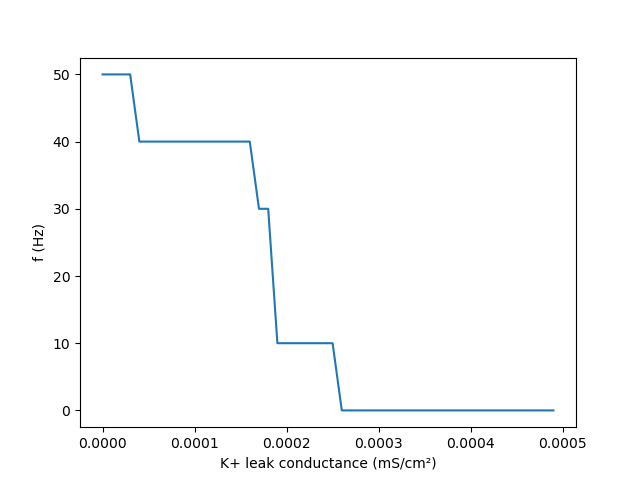

[ 160  889 1614 2339 3064]
[ 162  900 1632 2365 3097]
[ 166  911 1651 2392 3132]
[ 169  922 1671 2420 3169]
[ 172  935 1692 2450]
[ 176  948 1715 2482]
[ 179  961 1739 2516]
[ 184  976 1765 2553]
[ 188  992 1792 2592]
[ 192 1009 1822 2634]
[ 197 1028 1854 2681]
[ 203 1048 1890 2731]
[ 208 1071 1929 2788]
[ 215 1096 1973 2851]
[ 221 1125 2024 2924]
[ 229 1158 2084 3009]
[ 237 1199 2157 3116]
[ 246 1253 2256]
[ 257 1342 2430]
[269]
[283]
[299]
[320]
[348]
[389]
[489]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


Text(0, 0.5, 'f (Hz)')

In [28]:
###1.10###

soma(0.5).hh.gnabar=0.12 #mS/cm^2
soma(0.5).hh.gkbar=0.015 #mS/cm^2
soma(0.5).pas.g=0.001


iclamp.amp=0
h.finitialize(-65 * mV)
h.continuerun(80 * ms)

f=[]
g=[]

%matplotlib notebook
plt.figure()
for g_leak in np.arange(0.00,0.0005,0.00001):
    soma(0.5).pas.g = g_leak
    h.finitialize(-65 * mV)
    h.continuerun(80 * ms)
    x = np.array(v)
    #print(x)
    peaks,_ = find_peaks(x, 0)
    print(peaks)
    f.append(len(peaks)*10)
    g.append(g_leak)

#print(f)
#print(g)
plt.plot(g, f)


plt.xlabel("K+ leak conductance (mS/cm²)")
plt.ylabel("f (Hz)")

In [30]:
widths=peak_widths(x,peaks)

In [31]:
widths[0]

array([94.38092279, 78.73411313, 78.23845742, 78.20537647, 78.20066827,
       78.19907749])